## Everything everywhere all at once

In [37]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean

In [38]:
dust_caboverde_coarsen = xr.open_dataset("dust_caboverde_coarsen.nc")

In [39]:
ds_biochl = xr.open_dataset("ds_biochl.nc")

In [40]:
dust_caboverde_coarsen

<xarray.Dataset>
Dimensions:            (time: 80, lon: 66, lat: 50)
Coordinates:
  * lon                (lon) float64 -28.12 -27.88 -27.62 ... -12.12 -11.88
  * lat                (lat) float64 7.875 8.125 8.375 ... 19.62 19.88 20.12
    spatial_ref        int64 ...
  * time               (time) datetime64[ns] 2022-12-31 ... 2024-01-29
Data variables:
    Optical_Depth_047  (time, lon, lat) float64 ...
    Optical_Depth_055  (time, lon, lat) float64 ...

In [41]:
ds_biochl

<xarray.Dataset>
Dimensions:     (time: 80, latitude: 96, longitude: 128)
Coordinates:
  * latitude    (latitude) float64 8.063 8.188 8.313 8.438 ... 19.69 19.81 19.94
  * longitude   (longitude) float64 -27.94 -27.81 -27.69 ... -12.19 -12.06
  * time        (time) datetime64[ns] 2022-12-31 2023-01-05 ... 2024-01-29
Data variables:
    CHL         (time, latitude, longitude) float32 ...
    MICRO       (time, latitude, longitude) float32 ...
    MICRO_BIAS  (time, latitude, longitude) float32 ...
    MICRO_RMSE  (time, latitude, longitude) float32 ...
    NANO        (time, latitude, longitude) float32 ...
    NANO_BIAS   (time, latitude, longitude) float32 ...
    NANO_RMSE   (time, latitude, longitude) float32 ...
    PICO        (time, latitude, longitude) float32 ...
    PICO_BIAS   (time, latitude, longitude) float32 ...
    PICO_RMSE   (time, latitude, longitude) float32 ...
Attributes: (12/39)
    Conventions:               CF-1.7
    Creation_time:             08:52:33 UTC
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    Naming_authority:          CMEMS
    Netcdf_version_id:         V4
    citation:                  The licensees should respect the Copernicus Ma...
    ...                        ...
    start_time:                00:00:00 UTC
    stop_date:                 1997-09-04
    stop_time:                 23:59:00 UTC
    summary:                   Data products generated by the Ocean Colour co...
    title:                     c3s_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1M
    westernmost_longitude:     -180

In [42]:
"""
import pandas as pd
df = pd.DataFrame({
    'time': ds_biochl.time,
    'chlorophyll': ds_biochl.CHL.values,
    'dust': dust_caboverde_coarsen.Optical_Depth_047.values
})
"""

"\nimport pandas as pd\ndf = pd.DataFrame({\n    'time': ds_biochl.time,\n    'chlorophyll': ds_biochl.CHL.values,\n    'dust': dust_caboverde_coarsen.Optical_Depth_047.values\n})\n"

In [94]:

data_mindelo = pd.read_csv("../excsl_Mardata_csv.csv")
data_mindelo
ds_coarse = ds_biochl

In [51]:
def plotTimeSeriesRegionDust(latitude_range, longitude_range, time_range, region_name):
    # Define the latitude and longitude range for Cape Verde
    plt.figure()
    dust_caboverde_coarsen_region = dust_caboverde_coarsen.sel(lat=slice(*latitude_range), lon=slice(*longitude_range))
    dust_caboverde_coarsen_region = dust_caboverde_coarsen_region.sel(time = slice(*time_range))
    spatial_mean = dust_caboverde_coarsen_region.mean(dim=['lat', 'lon'])
    
    # Plot the spatial mean against time
    spatial_mean.Optical_Depth_047.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Dust Spatial Mean')
    plt.title('Spatial Mean of Dust '+region_name)
    
    # Show the plot
    #plt.show()
    #plt.figure()
    plt.gca().grid()
    (
    dust_caboverde_coarsen
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(lat=slice(*latitude_range), lon=slice(*longitude_range))
    .Optical_Depth_047
    .plot(
        x="lon", y="lat",
        cmap=cmocean.cm.thermal,
        size=10,
    )
    )
    return spatial_mean.Optical_Depth_047

In [52]:
def plotTimeSeriesRegionCHL(latitude_range, longitude_range, time_range, region_name):
    # Define the latitude and longitude range for Cape Verde
    plt.figure()
    ds_coarse_region = ds_coarse.sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
    ds_coarse_region = ds_coarse_region.sel(time = slice(*time_range))
    spatial_mean = ds_coarse_region.mean(dim=['latitude', 'longitude'])
    
    # Plot the spatial mean against time
    spatial_mean.CHL.plot.line(x='time', color = "blue")
    
    # Add plot labels and title
    plt.xlabel('Time')
    plt.ylabel('CHL Spatial Mean')
    plt.title('Spatial Mean of CHL'+region_name)
    
    # Show the plot
    #plt.show()
    plt.gca().grid()
    (
    ds_coarse
    #.sel(depth=slice(10, 50)).mean("depth")
    .sel(time="2022-01-13", method = "nearest")#(time>="2024-01-09" and time<="2024-01-11").mean()
    .sel(latitude=slice(*latitude_range), longitude=slice(*longitude_range))
    .CHL
    .plot(
        x="longitude", y="latitude",
        cmap=cmocean.cm.thermal,
        size=10,
    )
    )
    return spatial_mean.CHL

Latitude range (16.5, 17.25)
Longitude range (-25.25, -24.75)
          time  chlorophyll      dust
0   2022-12-31     0.466955  0.230522
1   2023-01-05     0.393249  0.220015
2   2023-01-10     0.374674  0.165424
3   2023-01-15     0.400238  0.268785
4   2023-01-20     0.354607  0.222492
..         ...          ...       ...
75  2024-01-10     0.223438  0.142117
76  2024-01-15     0.259832  0.200747
77  2024-01-20     0.303267  0.197237
78  2024-01-25     0.551836  0.605432
79  2024-01-29     0.535308  0.313179

[80 rows x 3 columns]


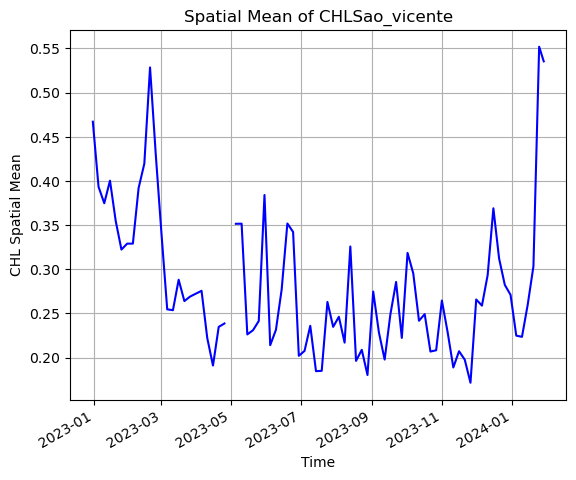

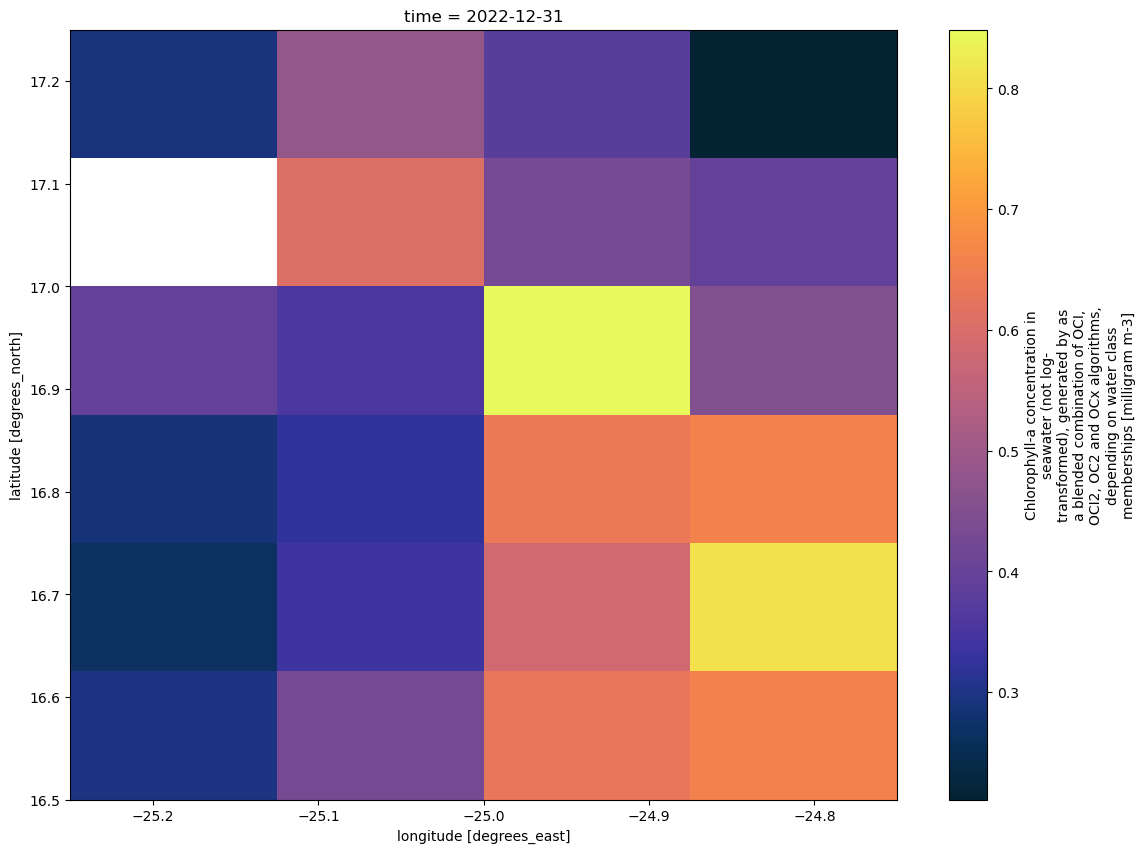

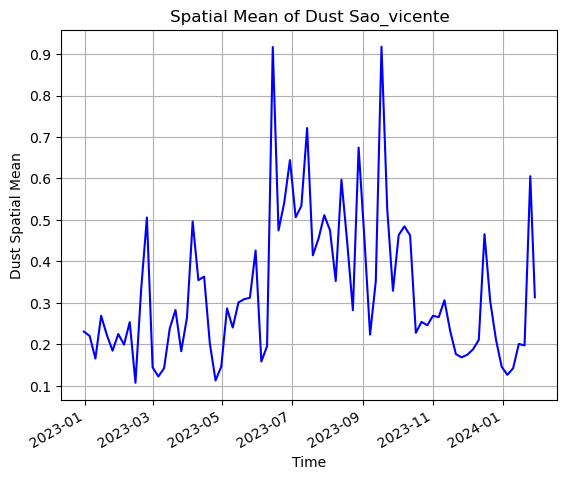

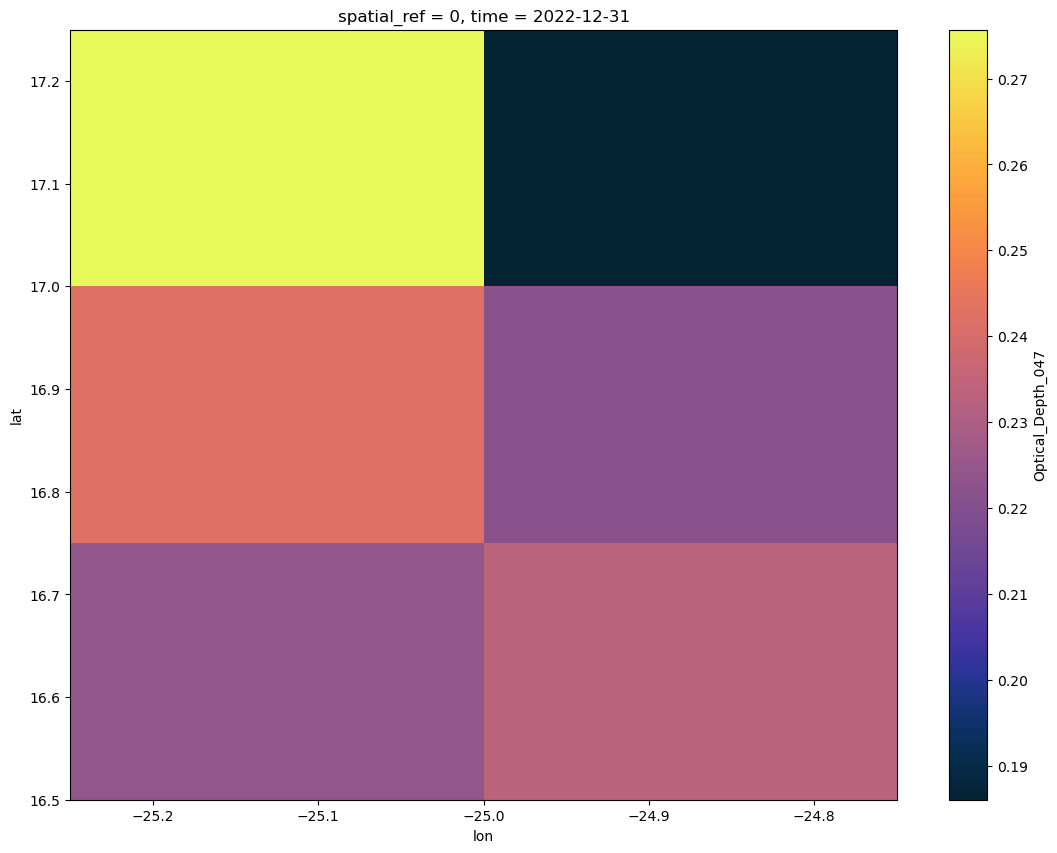

In [95]:
for i in range(5,6):
    latitude_range = (data_mindelo.iloc[i,4], data_mindelo.iloc[i,2])
    longitude_range = (data_mindelo.iloc[i,3], data_mindelo.iloc[i,1])
    print("Latitude range", latitude_range)
    print("Longitude range", longitude_range)
    
    region_name = data_mindelo.iloc[i,0]
    time_range = ("2022-12-01", "2024-03-01")
    chl = plotTimeSeriesRegionCHL(latitude_range, longitude_range, time_range, region_name)
    dust = plotTimeSeriesRegionDust(latitude_range, longitude_range, time_range, region_name)
    
df_saovicente = pd.DataFrame({
    'time': chl.time,
    'chlorophyll': chl.values,
    'dust': dust.values
})
df_saovicente.to_csv("timeseries_saovicente.csv", index = False)
df_saovicente = pd.read_csv("timeseries_saovicente.csv")
print(df_saovicente)

In [84]:
df_east = pd.DataFrame({
    'time': chl.time,
    'chlorophyll': chl.values,
    'dust': dust.values
})

In [85]:
df_east.to_csv("timeseries_north.csv", index = False)

In [86]:
df_east = pd.read_csv("timeseries_north.csv")

In [81]:
df_east

,time,chlorophyll,dust
0,2022-12-31,0.241673,0.247458
1,2023-01-05,0.235680,0.248810
2,2023-01-10,0.265162,0.197357
3,2023-01-15,0.268934,0.273841
4,2023-01-20,0.272648,0.250311
...,...,...,...
75,2024-01-10,0.176563,0.150204
76,2024-01-15,0.191369,0.234895
77,2024-01-20,0.194145,0.213256
78,2024-01-25,0.316291,0.842209


Latitude range (16.0, 17.75)
Longitude range (-26.0, -23.75)
Latitude range (14.75, 17.5)
Longitude range (-24.0, -22.0)
Latitude range (14.5, 15.75)
Longitude range (-25.25, -22.5)
Latitude range (16.75, 17.25)
Longitude range (-25.25, -24.75)
Latitude range (16.75, 17.25)
Longitude range (-25.0, -24.5)


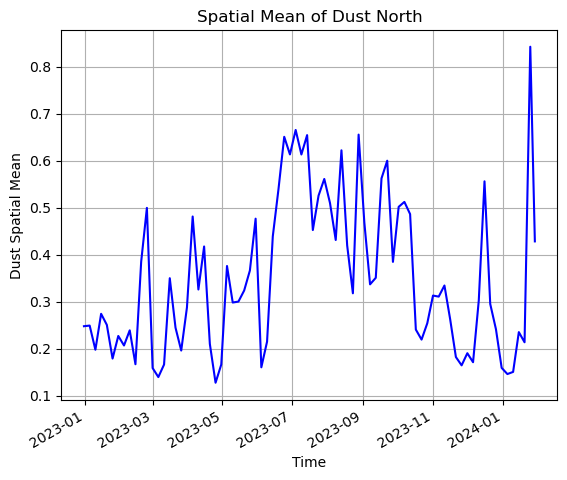

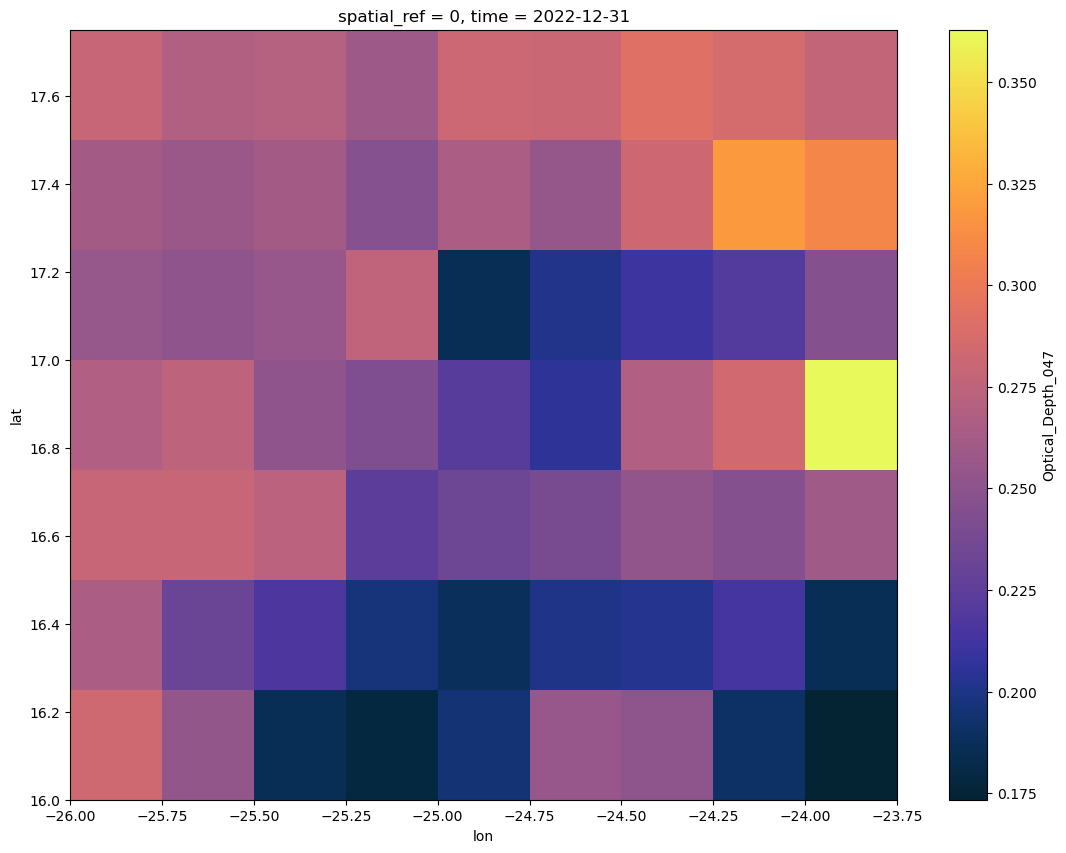

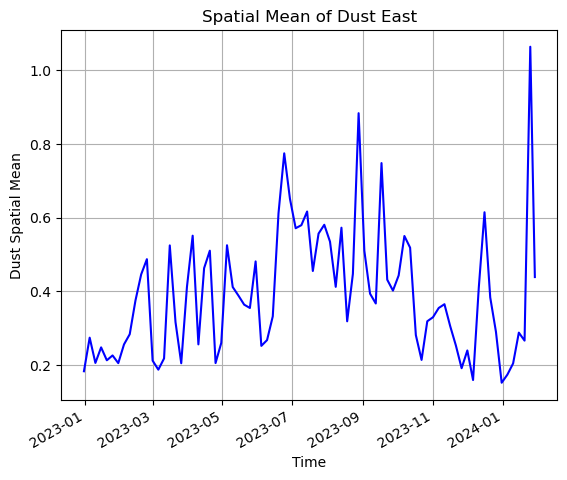

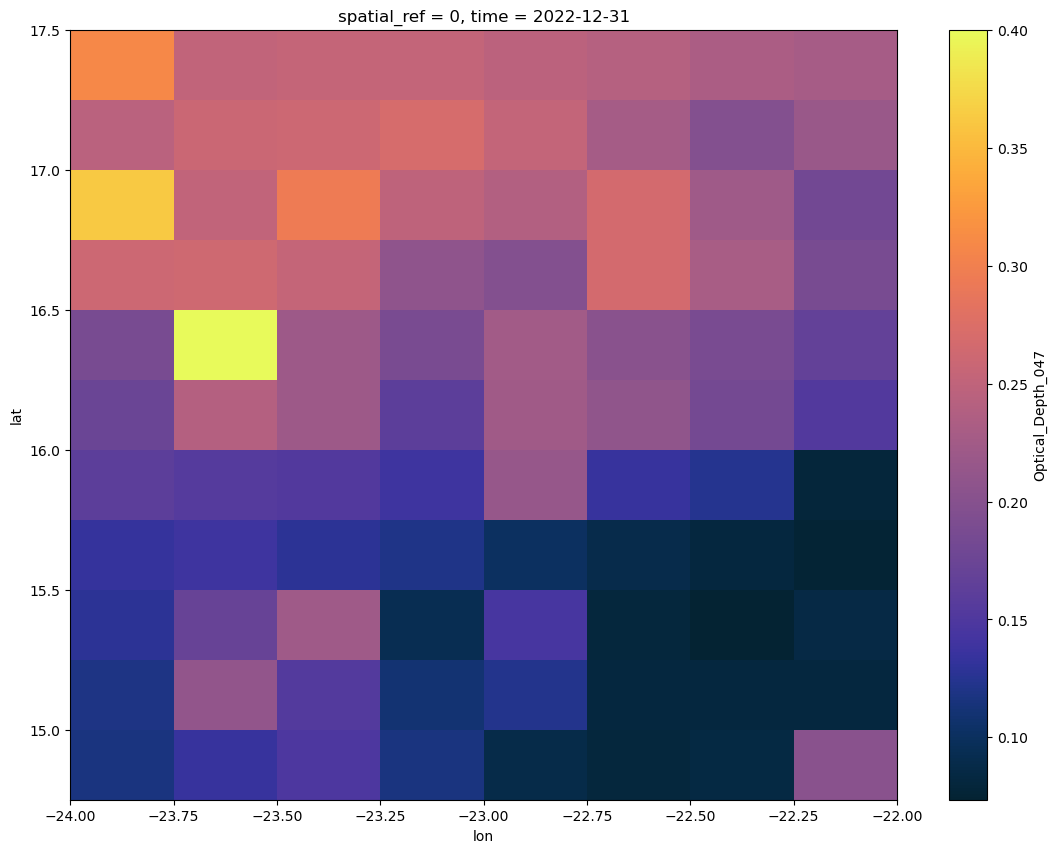

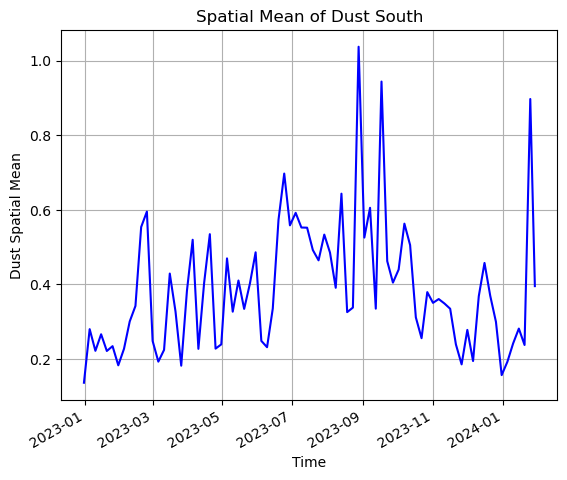

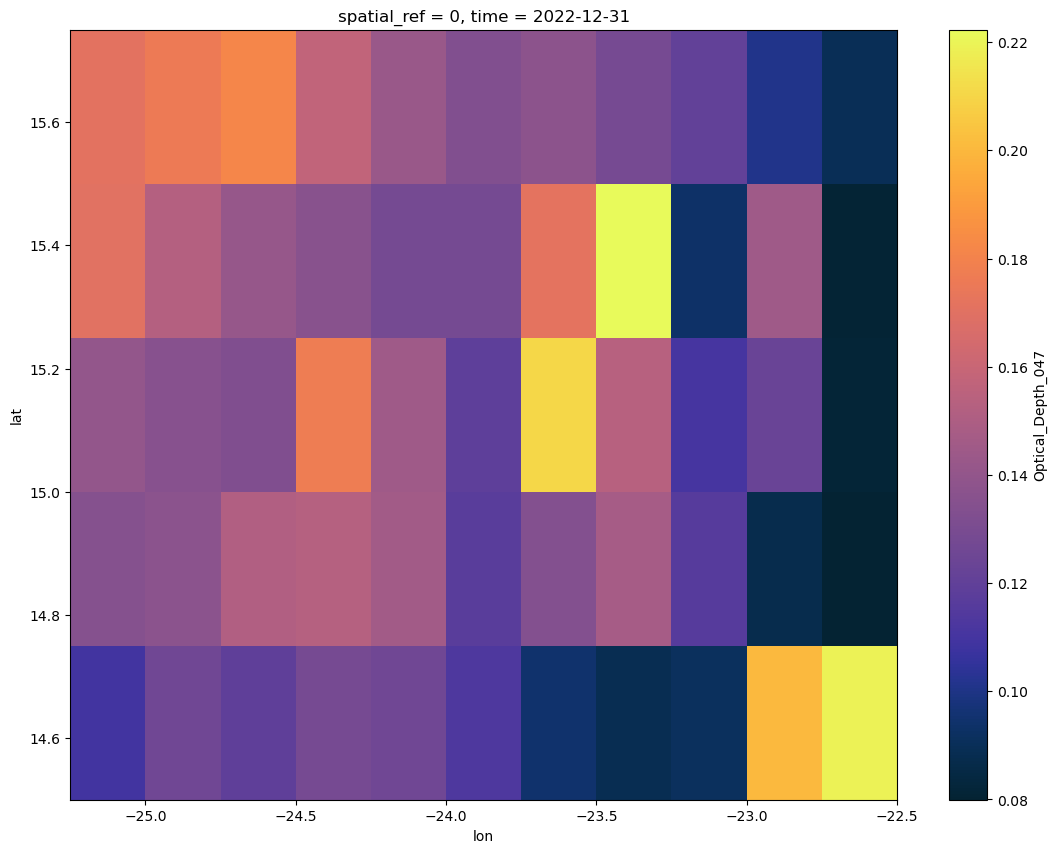

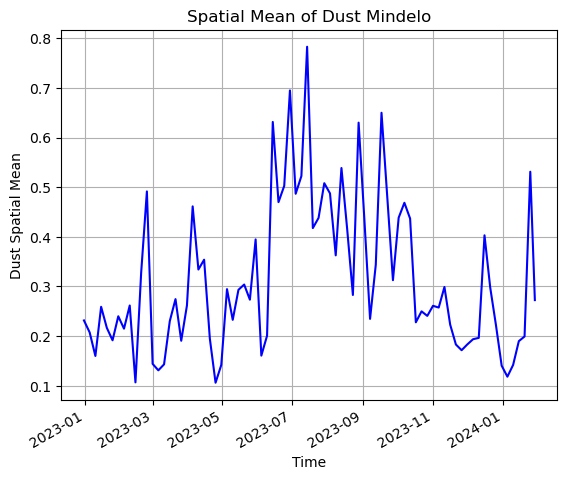

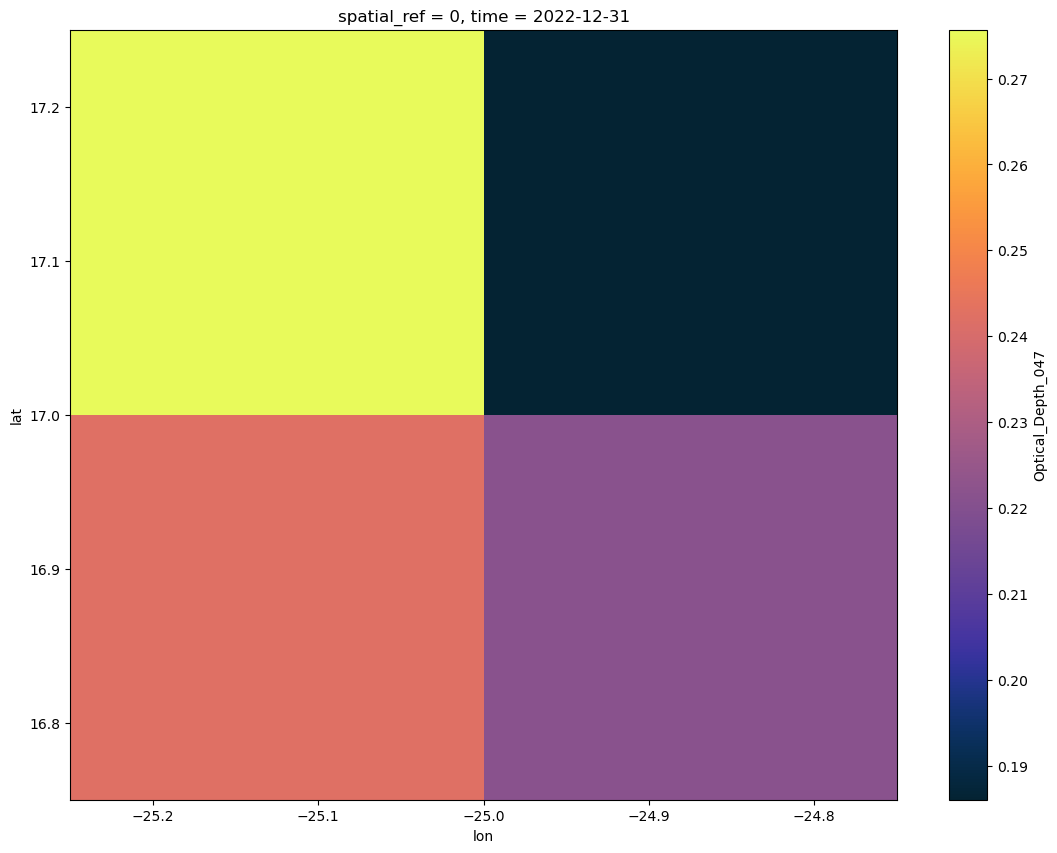

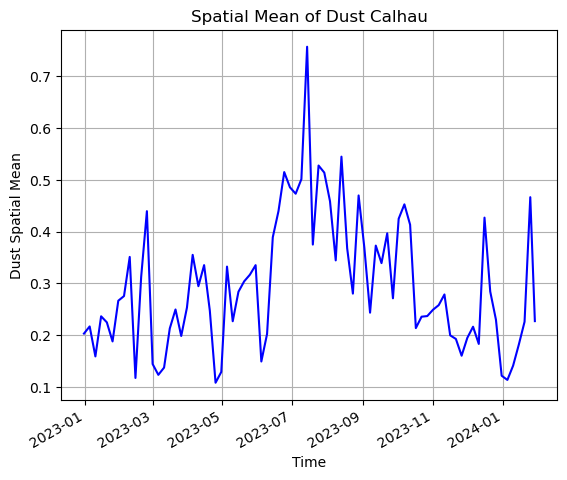

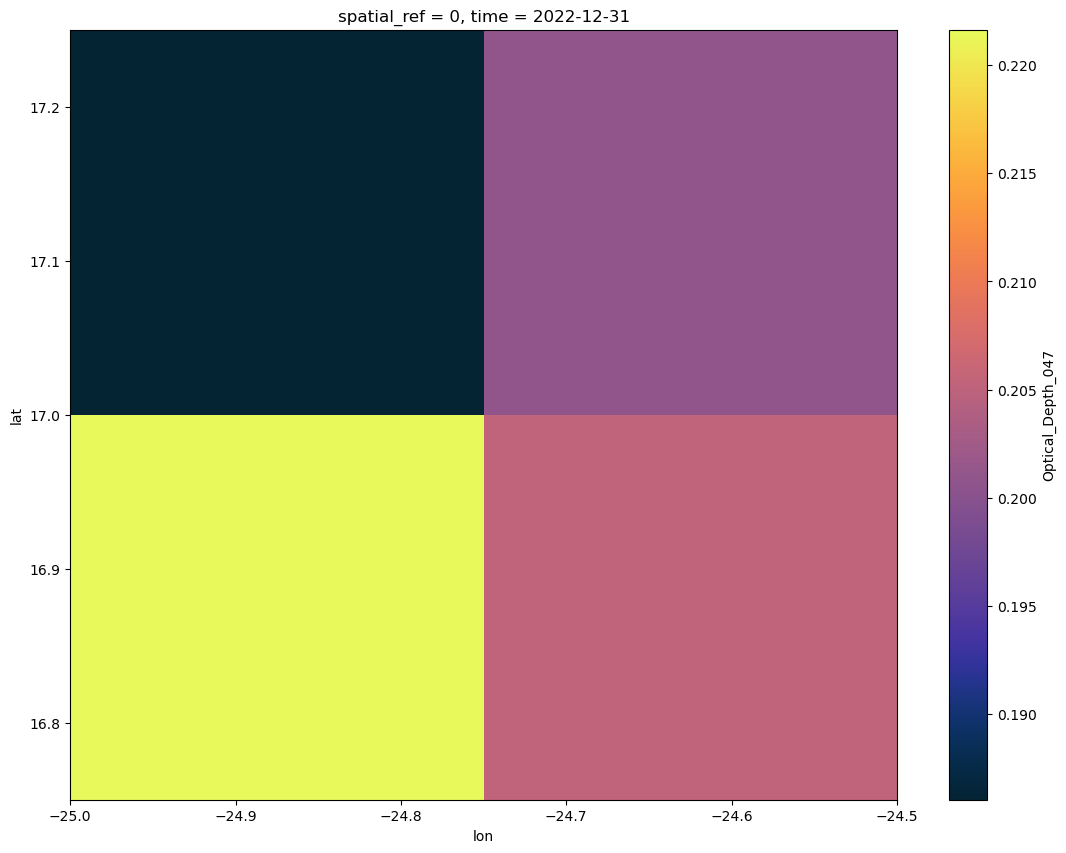

In [49]:
for i in range(5):
    latitude_range = (data_mindelo.iloc[i,4], data_mindelo.iloc[i,2])
    longitude_range = (data_mindelo.iloc[i,3], data_mindelo.iloc[i,1])
    print("Latitude range", latitude_range)
    print("Longitude range", longitude_range)
    region_name = data_mindelo.iloc[i,0]
    time_range = ("2022-12-01", "2024-03-01")
    plotTimeSeriesRegionDust(latitude_range, longitude_range, time_range, region_name)